In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mutual_info_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from IPython.display import display

from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from numpy import arange

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn import feature_selection, neighbors, model_selection, preprocessing, linear_model, svm, ensemble

import pickle

In [5]:
df = pd.read_csv('C:/Users/shakh/Desktop/project2_v2/healthcare-dataset-stroke-data.csv')
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [6]:
df.columns = [col.lower() for col in df]
df.columns = [col.replace(' ', '_') for col in df]
df.rename(columns={'avg_glucose_level': 'glucose_lvl'}, inplace=True)
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'glucose_lvl', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5110 non-null   int64  
 1   gender          5110 non-null   object 
 2   age             5110 non-null   float64
 3   hypertension    5110 non-null   int64  
 4   heart_disease   5110 non-null   int64  
 5   ever_married    5110 non-null   object 
 6   work_type       5110 non-null   object 
 7   residence_type  5110 non-null   object 
 8   glucose_lvl     5110 non-null   float64
 9   bmi             4909 non-null   float64
 10  smoking_status  5110 non-null   object 
 11  stroke          5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,glucose_lvl,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.isnull().sum()

id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
work_type           0
residence_type      0
glucose_lvl         0
bmi               201
smoking_status      0
stroke              0
dtype: int64

In [10]:
bmi = df['bmi']
bmi_mean = bmi.mean()
bmi.fillna(bmi_mean, inplace=True)

df.isnull().sum()

id                0
gender            0
age               0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
glucose_lvl       0
bmi               0
smoking_status    0
stroke            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [13]:
global_stroke = df.stroke.mean()
global_stroke

0.0487279843444227

In [14]:
numerical = ['age', 'glucose_lvl', 'bmi'] 
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [15]:
df[categorical].nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [16]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).stroke.agg(['mean', 'count'])
    df_group['risk'] = df_group['mean'] / global_stroke
    display(df_group)
    print()

gender


,mean,count,risk
gender,,,
Female,0.047094,2994,0.966471
Male,0.051064,2115,1.047936
Other,0.000000,1,0.000000



hypertension


,mean,count,risk
hypertension,,,
0,0.039679,4612,0.814298
1,0.132530,498,2.719795



heart_disease


,mean,count,risk
heart_disease,,,
0,0.041787,4834,0.857563
1,0.170290,276,3.494703



ever_married


,mean,count,risk
ever_married,,,
No,0.016505,1757,0.338725
Yes,0.065613,3353,1.346513



work_type


,mean,count,risk
work_type,,,
Govt_job,0.050228,657,1.030790
Never_worked,0.000000,22,0.000000
Private,0.050940,2925,1.045399
Self-employed,0.079365,819,1.628737
children,0.002911,687,0.059744



residence_type


,mean,count,risk
residence_type,,,
Rural,0.045346,2514,0.930596
Urban,0.052003,2596,1.067212



smoking_status


,mean,count,risk
smoking_status,,,
Unknown,0.030440,1544,0.624701
formerly smoked,0.079096,885,1.623216
never smoked,0.047569,1892,0.976209
smokes,0.053232,789,1.092431


In [17]:
df = df.drop(df[df['gender'] == 'Other'].index)
df = df.drop(df[df['work_type'] == 'Never_worked'].index)

In [18]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).stroke.agg(['mean', 'count'])
    df_group['risk'] = df_group['mean'] / global_stroke
    display(df_group)
    print()

gender


,mean,count,risk
gender,,,
Female,0.047268,2983,0.970035
Male,0.051331,2104,1.053415



hypertension


,mean,count,risk
hypertension,,,
0,0.039878,4589,0.818379
1,0.132530,498,2.719795



heart_disease


,mean,count,risk
heart_disease,,,
0,0.041987,4811,0.861663
1,0.170290,276,3.494703



ever_married


,mean,count,risk
ever_married,,,
No,0.016724,1734,0.343218
Yes,0.065613,3353,1.346513



work_type


,mean,count,risk
work_type,,,
Govt_job,0.050228,657,1.030790
Private,0.050958,2924,1.045756
Self-employed,0.079365,819,1.628737
children,0.002911,687,0.059744



residence_type


,mean,count,risk
residence_type,,,
Rural,0.045491,2506,0.933567
Urban,0.052305,2581,1.073414



smoking_status


,mean,count,risk
smoking_status,,,
Unknown,0.030599,1536,0.627955
formerly smoked,0.079186,884,1.625052
never smoked,0.047923,1878,0.983487
smokes,0.053232,789,1.092431


In [19]:
categorical

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'smoking_status']

In [20]:
def calc_mis(series):
    return mutual_info_score(series, df.stroke)

In [21]:
df[categorical].apply(calc_mis).sort_values(ascending=False)

ever_married      0.006831
work_type         0.006640
hypertension      0.005960
heart_disease     0.005891
smoking_status    0.002736
residence_type    0.000125
gender            0.000043
dtype: float64

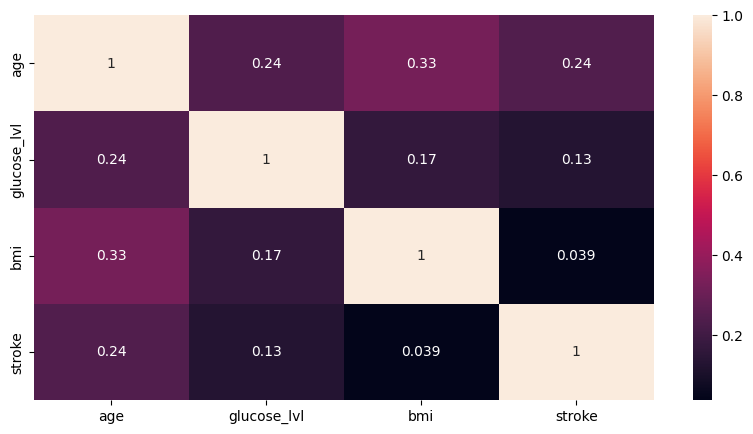

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical+['stroke']].corr(), annot=True)
plt.show()

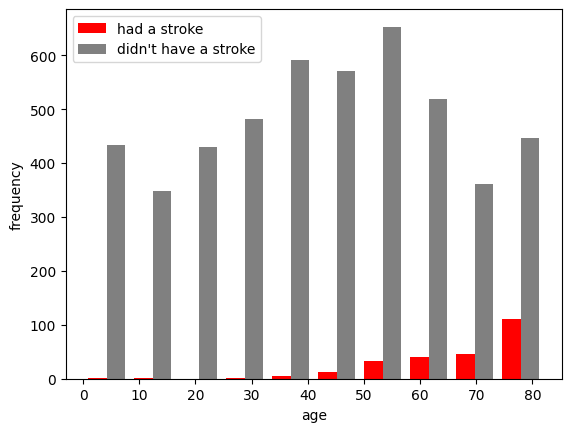

In [23]:
stroke_age_yes = df[df.stroke == 1].age
stroke_age_no = df[df.stroke == 0]. age

plt.hist([stroke_age_yes, stroke_age_no], color=['red', 'gray'], label=['had a stroke', 'didn\'t have a stroke'])
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend()
plt.show()

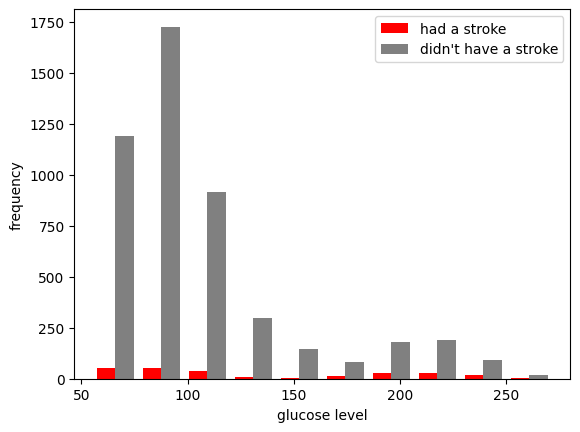

In [24]:
stroke_glucose_yes = df[df.stroke == 1].glucose_lvl
stroke_glucose_no = df[df.stroke == 0]. glucose_lvl

plt.hist([stroke_glucose_yes, stroke_glucose_no], color=['red', 'gray'], label=['had a stroke', 'didn\'t have a stroke'])
plt.xlabel('glucose level')
plt.ylabel('frequency')
plt.legend()
plt.show()

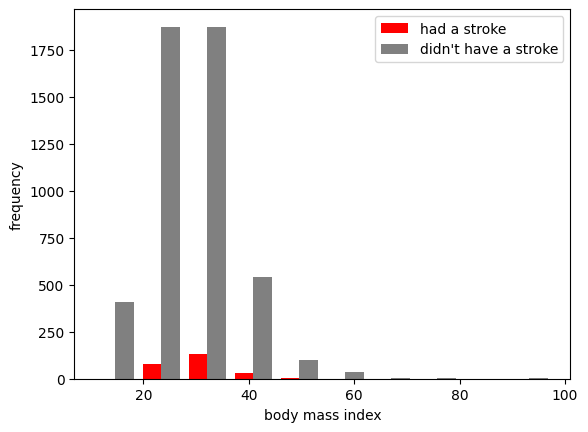

In [25]:
stroke_bmi_yes = df[df.stroke == 1].bmi
stroke_bmi_no = df[df.stroke == 0]. bmi

plt.hist([stroke_bmi_yes, stroke_bmi_no], color=['red', 'gray'], label=['had a stroke', 'didn\'t have a stroke'])
plt.xlabel('body mass index')
plt.ylabel('frequency')
plt.legend()
plt.show()

Train, test and valid Split

In [26]:
df_train, df_test_valid = train_test_split(df, test_size=0.4, random_state=15)
print(len(df_train), len(df_test_valid))

3052 2035


In [27]:
df_test, df_val = train_test_split(df_test_valid, test_size=0.5, random_state=25)
print(len(df_train), len(df_test), len(df_val))

3052 1017 1018


In [28]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.stroke.values
y_test = df_test.stroke.values
y_val = df_val.stroke.values

del df_train['stroke']
del df_test['stroke']
del df_val['stroke']

df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,glucose_lvl,bmi,smoking_status
0,57468,Female,44.0,0,0,Yes,Private,Rural,70.58,25.1,never smoked
1,7663,Male,20.0,0,0,No,Govt_job,Rural,106.97,27.9,formerly smoked
2,44764,Female,78.0,1,0,Yes,Self-employed,Rural,59.20,29.1,Unknown
3,45754,Female,20.0,0,0,No,Private,Urban,75.94,28.3,never smoked
4,7665,Female,73.0,0,0,Yes,Private,Rural,98.34,30.9,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
3047,3984,Female,33.0,0,0,Yes,Private,Rural,84.13,26.3,never smoked
3048,40390,Female,12.0,0,0,No,children,Rural,150.03,28.2,never smoked
3049,62289,Female,34.0,0,0,Yes,Private,Urban,97.23,27.5,Unknown
3050,23332,Female,42.0,0,0,Yes,Private,Rural,94.38,34.0,never smoked


In [29]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

One-hot Encoding

In [30]:
dv = DictVectorizer(sparse=False)

In [31]:
train_dict = df_train[categorical+numerical].to_dict(orient='records')
train_dict[0]

{'gender': 'Female',
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 'Yes',
 'work_type': 'Private',
 'residence_type': 'Rural',
 'smoking_status': 'never smoked',
 'age': 44.0,
 'glucose_lvl': 70.58,
 'bmi': 25.1}

In [32]:
X_train = dv.fit_transform(train_dict)
X_train

array([[44. , 25.1,  0. , ...,  1. ,  0. ,  0. ],
       [20. , 27.9,  1. , ...,  0. ,  0. ,  0. ],
       [78. , 29.1,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [34. , 27.5,  0. , ...,  1. ,  0. ,  0. ],
       [42. , 34. ,  0. , ...,  1. ,  0. ,  0. ],
       [42. , 33.4,  0. , ...,  0. ,  0. ,  0. ]])

In [33]:
val_dict = df_val[categorical+numerical].to_dict(orient='records')
val_dict[0]

{'gender': 'Male',
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 'No',
 'work_type': 'Private',
 'residence_type': 'Rural',
 'smoking_status': 'never smoked',
 'age': 18.0,
 'glucose_lvl': 98.07,
 'bmi': 24.0}

In [34]:
X_val = dv.fit_transform(val_dict)
X_val

array([[18. , 24. ,  1. , ...,  1. ,  0. ,  0. ],
       [45. , 25.6,  0. , ...,  1. ,  0. ,  0. ],
       [66. , 38.3,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 9. , 23.3,  1. , ...,  0. ,  0. ,  1. ],
       [17. , 40.2,  1. , ...,  1. ,  0. ,  0. ],
       [76. , 27.1,  0. , ...,  0. ,  0. ,  0. ]])

In [35]:
dv.get_feature_names_out()

array(['age', 'bmi', 'ever_married=No', 'ever_married=Yes',
       'gender=Female', 'gender=Male', 'glucose_lvl', 'heart_disease',
       'hypertension', 'residence_type=Rural', 'residence_type=Urban',
       'smoking_status=Unknown', 'smoking_status=formerly smoked',
       'smoking_status=never smoked', 'smoking_status=smokes',
       'work_type=Govt_job', 'work_type=Private',
       'work_type=Self-employed', 'work_type=children'], dtype=object)

Logistic Regression

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred

array([0.00427336, 0.01708872, 0.06118143, ..., 0.00213608, 0.00404538,
       0.25927749])

In [38]:
stroke_decision = (y_val_pred >= 0.5)
stroke_decision

array([False, False, False, ..., False, False, False])

In [39]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction'] = stroke_decision
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.004273,False,0
1,0.017089,False,0
2,0.061181,False,0
3,0.010240,False,0
4,0.009141,False,0
...,...,...,...
1013,0.024321,False,0
1014,0.047872,False,0
1015,0.002136,False,0
1016,0.004045,False,0


In [40]:
(df_pred['prediction'] == df_pred['actual']).mean()

0.9548133595284872

In [41]:
accuracy = accuracy_score(df_pred['actual'], df_pred['prediction'])
precision = precision_score(df_pred['actual'], df_pred['prediction'])
recall = recall_score(df_pred['actual'], df_pred['prediction'])
f1 = f1_score(df_pred['actual'], df_pred['prediction'])

In [42]:
model_name = 'logistic regression'
metrics_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])

metrics_df = pd.concat([metrics_df, pd.DataFrame([
    {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
])], ignore_index=True)
metrics_df

,model,accuracy,precision,recall,f1_score
0,logistic regression,0.954813,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

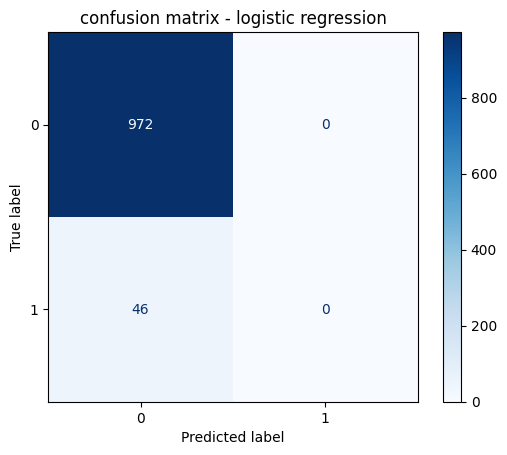

In [43]:
conf_matrix = confusion_matrix(df_pred['actual'], df_pred['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title(f'confusion matrix - {model_name}')
plt.show

Improved

In [44]:
def split_data(df):
    df_train, df_test_valid = train_test_split(df, test_size=0.4, random_state=15)
    df_test, df_val = train_test_split(df_test_valid, test_size=0.5, random_state=25)

    y_train = df_train.stroke.values
    y_test = df_test.stroke.values
    y_val = df_val.stroke.values

    del df_train['stroke']
    del df_test['stroke']
    del df_val['stroke']

    return df_train, y_train, df_test, y_test, df_val, y_val

In [45]:
def prepare_data(df_train, df_val, features):
    dv = DictVectorizer(sparse=False)

    train_dicts_temp = df_train[features].to_dict(orient='records')
    X_train_temp = dv.fit_transform(train_dicts_temp)

    val_dicts_temp = df_val[features].to_dict(orient='records')
    X_val_temp = dv.fit_transform(val_dicts_temp)
    
    dv.get_feature_names_out()

    return X_train_temp, X_val_temp

In [46]:
def train_model(X_train, y_train):
    model_temp = LogisticRegression()
    model_temp.fit(X_train, y_train)

    return model_temp

In [47]:
def model_eval(model, model_name, X_val, y_val, threshold):
    y_pred = model.predict_proba(X_val)[:, 1]
    stroke_decision = (y_pred >= threshold)

    accuracy = accuracy_score(y_val, stroke_decision)
    precision = precision_score(y_val, stroke_decision)
    recall = recall_score(y_val, stroke_decision)
    f1 = f1_score(y_val, stroke_decision)

    res_df = pd.DataFrame([{'model': model_name, 'accuracy': accuracy, 'precision': precision, 'recall':recall, 'f1_score': f1}])
    return res_df, stroke_decision, y_pred

In [48]:
X_train, X_val = prepare_data(df_train, df_val, categorical+numerical)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new, 'test_function', X_val, y_val, 0.5)
metrics_df = pd.concat([metrics_df, res_model_df], ignore_index=True)
metrics_df

,model,accuracy,precision,recall,f1_score
0,logistic regression,0.954813,0.0,0.0,0.0
1,test_function,0.954813,0.0,0.0,0.0


In [49]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

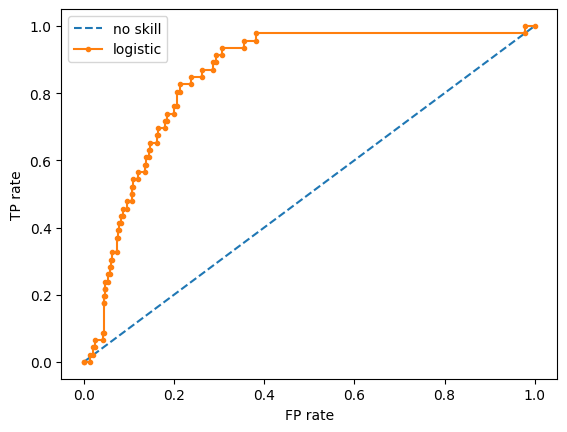

In [50]:
plt.plot([0,1], [0,1], linestyle='--', label='no skill')
plt.plot(fpr, tpr, marker='.', label='logistic')

plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.legend()
plt.show()

In [51]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds =  arange(0,1,0.001)
scores = [f1_score(y_val, to_labels(y_val_pred, t)) for t in thresholds]

ix = argmax(scores)
print('best threshold=%.3f, f-score=%.5f' % (thresholds[ix], scores[ix]))

best threshold=0.126, f-score=0.28409


In [52]:
X_train, X_val = prepare_data(df_train, df_val, categorical+numerical)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new, 'logistic_regression t=0.126', X_val, y_val, 0.126)
metrics_df = pd.concat([metrics_df, res_model_df], ignore_index=True)
metrics_df

,model,accuracy,precision,recall,f1_score
0,logistic regression,0.954813,0.000000,0.000000,0.000000
1,test_function,0.954813,0.000000,0.000000,0.000000
2,logistic_regression t=0.126,0.876228,0.192308,0.543478,0.284091


min-max normalization

In [53]:
df_copy = df.copy()

In [54]:
for col in numerical:
    min_col = df_copy[col].min()
    max_col = df_copy[col].max()

    df_copy[col] = (df_copy[col] - min_col) / (max_col - min_col)

In [55]:
df_copy['gender'] = df_copy['gender'].map({'Male': 0, 'Female': 1})
df_copy['ever_married'] = df_copy['ever_married'].map({'Yes': 1, 'No': 0})

In [56]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)

X_train, X_val = prepare_data(df_train, df_val, categorical+numerical)

model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new, 'lr model feature eng t=0.126', X_val, y_val, 0.126)
metrics_df = pd.concat([metrics_df, res_model_df], ignore_index=True)
metrics_df

,model,accuracy,precision,recall,f1_score
0,logistic regression,0.954813,0.000000,0.000000,0.000000
1,test_function,0.954813,0.000000,0.000000,0.000000
2,logistic_regression t=0.126,0.876228,0.192308,0.543478,0.284091
3,lr model feature eng t=0.126,0.881139,0.184874,0.478261,0.266667


In [57]:
def model_eval(model, model_name, X_val, y_val, threshold):
    y_pred = model.predict_proba(X_val)[:, 1]
    stroke_decision = (y_pred >= threshold)

    accuracy = accuracy_score(y_val, stroke_decision)
    precision = precision_score(y_val, stroke_decision)
    recall = recall_score(y_val, stroke_decision)
    f1 = f1_score(y_val, stroke_decision)

    res_df = pd.DataFrame([{'model': model_name, 'accuracy': accuracy, 'precision': precision, 'recall':recall, 'f1_score': f1}])
    return res_df, stroke_decision, y_pred
    

In [58]:
seed = 124
models = [
    ('k_nearest_neighbors', neighbors.KNeighborsClassifier()),
    ('logistic_regression', linear_model.LogisticRegression(random_state=seed)),
    ('support_vector_machines', svm.SVC(random_state=seed)),
    ('random_forest', ensemble.RandomForestClassifier(random_state=seed)),
    ('gradient_boosting', ensemble.GradientBoostingClassifier(random_state=seed)),
]

def run_experiments(models, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val, seed=seed):
    results = dict()
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        f1 = metrics.f1_score(y_test, predictions)
        print(f"{name} --> acc = {accuracy * 100}%, f1_score = {f1}")

results = run_experiments(models=models)

k_nearest_neighbors --> acc = 94.59724950884086%, f1_score = 0.03508771929824561
logistic_regression --> acc = 95.48133595284872%, f1_score = 0.0
support_vector_machines --> acc = 95.48133595284872%, f1_score = 0.0
random_forest --> acc = 95.08840864440079%, f1_score = 0.03846153846153846
gradient_boosting --> acc = 95.48133595284872%, f1_score = 0.08


evaluation of model on test data

In [59]:
X_train, X_test = prepare_data(df_train, df_test, categorical+numerical)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new, 'lr model feature eng t=0.126 test data', X_test, y_test, 0.126)
metrics_df = pd.concat([metrics_df, res_model_df], ignore_index=True)
metrics_df

,model,accuracy,precision,recall,f1_score
0,logistic regression,0.954813,0.000000,0.000000,0.000000
1,test_function,0.954813,0.000000,0.000000,0.000000
2,logistic_regression t=0.126,0.876228,0.192308,0.543478,0.284091
3,lr model feature eng t=0.126,0.881139,0.184874,0.478261,0.266667
4,lr model feature eng t=0.126 test data,0.880039,0.207207,0.403509,0.273810


train on train and val data

In [60]:
X_train, X_val = prepare_data(pd.concat([df_train, df_test], ignore_index=True), df_val, categorical+numerical)
model_new = train_model(X_train, np.concatenate((y_train, y_test), axis=0))
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new, 'lr model feature eng t=0.126 train+test data', X_val, y_val, 0.126)
metrics_df = pd.concat([metrics_df, res_model_df], ignore_index=True)
metrics_df

,model,accuracy,precision,recall,f1_score
0,logistic regression,0.954813,0.000000,0.000000,0.000000
1,test_function,0.954813,0.000000,0.000000,0.000000
2,logistic_regression t=0.126,0.876228,0.192308,0.543478,0.284091
3,lr model feature eng t=0.126,0.881139,0.184874,0.478261,0.266667
4,lr model feature eng t=0.126 test data,0.880039,0.207207,0.403509,0.273810
5,lr model feature eng t=0.126 train+test data,0.870334,0.183824,0.543478,0.274725


In [61]:
def prepare_data(df_train, df_val, features):
    dv_temp = DictVectorizer(sparse=False)

    train_dicts_temp = df_train[features].to_dict(orient='records')
    X_train_temp = dv_temp.fit_transform(train_dicts_temp)

    val_dicts_temp = df_val[features].to_dict(orient='records')
    X_val_temp = dv_temp.fit_transform(val_dicts_temp)
    
    dv_temp.get_feature_names_out()

    return X_train_temp, X_val_temp, dv_temp

In [62]:
X_train, X_val, dv_model = prepare_data(pd.concat([df_train, df_test, df_val], ignore_index=True), df_val, categorical+numerical)
model_final = train_model(X_train, np.concatenate((y_train, y_test, y_val), axis=0))

In [64]:
model_file_path = 'C:/Users/shakh/Desktop/project2_v2/models/lr_model_stroke_prediction.sav'
pickle.dump(model_final, open(model_file_path, 'wb'))

In [65]:
encoding_model_file_path = 'C:/Users/shakh/Desktop/project2_v2/models/encoding_model.sav'
pickle.dump(dv_model, open(encoding_model_file_path, 'wb'))

In [66]:
loaded_model = pickle.load(open(model_file_path, 'rb'))
loaded_encoding_model = pickle.load(open(encoding_model_file_path, 'rb'))
res_model_df, y_pred_class, y_pred_proba = model_eval(loaded_model, 'lr model from file', X_val, y_val, 0.126)
res_model_df

,model,accuracy,precision,recall,f1_score
0,lr model from file,0.872299,0.186567,0.543478,0.277778
